In [210]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial as poly

In [134]:
V20=np.loadtxt(r'C:\Users\Physlab310\Desktop\Charulata and Nathan\2025-04-18_Ge_20Cn100\Vavg.txt')
I20=np.loadtxt(r'C:\Users\Physlab310\Desktop\Charulata and Nathan\2025-04-18_Ge_20Cn100\Iavg.txt')

Ierr = np.zeros_like(I20) # Defining errors based on data table from K6487 manual
for i in range(len(I20)):
    if I20[i] > 1e-2:
        Ierr[i] = I20[i]*0.1 + 1e-6
    elif (I20[i] > 1e-3) & (I20[i] < 1e-2):
        Ierr[i] = I20[i]*0.1 + 1e-7
    elif (I20[i] > 1e-4) & (I20[i] < 1e-3):
        Ierr[i] = I20[i]*0.1 + 1e-8
    elif (I20[i] > 1e-5) & (I20[i] < 1e-4):
        Ierr[i] = I20[i]*0.1 + 1e-9
    elif (I20[i] > 1e-6) & (I20[i] < 1e-5):
        Ierr[i] = I20[i]*0.1 + 1e-10
    elif (I20[i] > 1e-7) & (I20[i] < 1e-6):
        Ierr[i] = I20[i]*0.1 + 1e-11
    elif (I20[i] > 1e-8) & (I20[i] < 1e-7):
        Ierr[i] = I20[i]*0.15 + 1e-12
    elif (I20[i] > 1e-9) & (I20[i] < 1e-8):
        Ierr[i] = I20[i]*0.15 + 1e-13
    elif (I20[i] > 1e-10) & (I20[i] < 1e-9):
        Ierr[i] = I20[i]*0.2 + 1e-14
    else:
        Ierr[i] = I20[i]*0.3 + 1e-15

In [205]:
def I(V,Eg,C):
    k = 8.617e-5 # Boltzman Constant in Ev/K
    q = 1.0 # Charge of electron in e
    T = 283.15 # Temperature of data in K
    return C * np.exp((-Eg)/(k*T)) * (np.exp((q*V)/(k*T)))

In [181]:
k = 8.617e-5
T = 263.15
(np.exp(V20[40:]/(k*T)) -1)


array([   62.08260448,    68.85936828,    75.73980308,    83.9775498 ,
          93.07360673,   103.10389079,   114.14192067,   126.31094772,
         139.77256211,   154.6039492 ,   169.49473031,   187.27135079,
         206.77148373,   228.30860368,   251.88885862,   277.77828735,
         306.23630046,   337.38984076,   368.63020045,   405.80166202,
         446.64892981,   491.47802761,   540.34858644,   594.03451131,
         653.02208696,   711.7006758 ,   781.73043369,   858.03216511,
         941.28915826,  1032.60621792,  1131.99908306,  1240.30915339,
        1358.3712061 ,  1475.09899659,  1612.83241368,  1762.66160025,
        1924.65302018,  2100.25592978,  2290.0214495 ,  2494.32331167,
        2696.38187795,  2932.72851058,  3188.1899789 ,  3463.5689804 ,
        3757.70894758,  4075.18106925,  4414.94430575,  4779.70550688,
        5137.61397394,  5553.62252091,  6001.8235732 ,  6483.91824766,
        7001.33785089,  7558.1862422 ,  8153.70457995,  8790.46201197,
      

[  0.50004957 364.61664236]
[2.01767715e+05 3.01519476e+09]


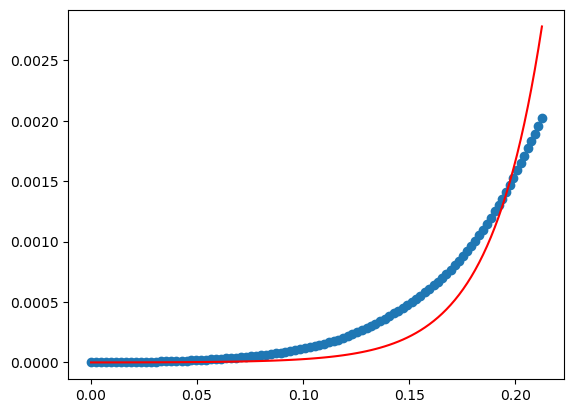

In [174]:
n=40
m=len(I20)
sol = opt.curve_fit(I, V20[n:m], I20[n:m], p0=[0.68,50], sigma=Ierr[n:m],full_output=True,check_finite=True,bounds=([0.5,0],[0.8,np.inf]))

plt.scatter(V20,I20)
plt.plot(V20, I(V20, *sol[0]), color='r')

perr = np.sqrt(np.diag(sol[1]))
print(sol[0])
print(perr)

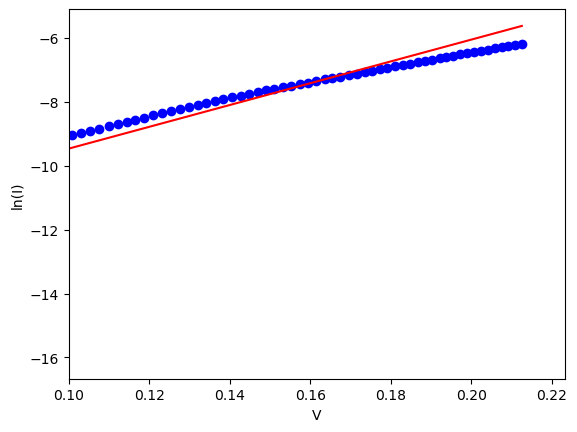

In [225]:
Eg=0.5
C=0.01

n=0

fig, ax = plt.subplots()

plt.scatter(V20[n:],np.log(I20[n:]),color='b')
fit = poly.Polynomial.fit(V20,np.log(I20),deg=1)
plt.plot(V20[n:],fit(V20[n:]),color='r')
plt.xlabel('V')
plt.ylabel('ln(I)')
plt.xlim(0.1)
Io = fit(0)
